In [ ]:
pip install scikit-image numpy


In [ ]:
!pip install shap
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.2 MB/s eta 0:00:00
Mounted at /content/drive


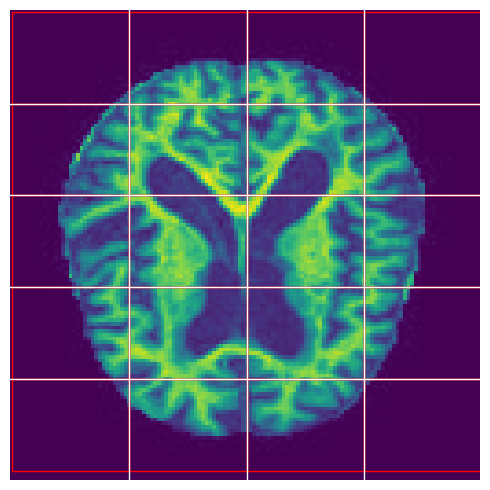

In [ ]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load your MRI scan here
mri_scan = imread('/content/drive/My Drive/10_Samples_MRI/Mild/Copy of mild_688.jpg')

# Define the number of segments in each dimension
num_segments_vertical = 5
num_segments_horizontal = 4

# Calculate the size of each segment
segment_height = mri_scan.shape[0] // num_segments_vertical
segment_width = mri_scan.shape[1] // num_segments_horizontal

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Show the image
ax.imshow(mri_scan)

# Add grid lines for the segments
for i in range(1, num_segments_vertical):
    ax.axhline(y=i*segment_height, color='w', linestyle='-', linewidth=1)
for j in range(1, num_segments_horizontal):
    ax.axvline(x=j*segment_width, color='w', linestyle='-', linewidth=1)

# Add rectangles for the segments (optional)
for i in range(num_segments_vertical):
    for j in range(num_segments_horizontal):
        rect = patches.Rectangle((j*segment_width, i*segment_height), segment_width, segment_height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

# Turn off axes and show the plot
ax.axis('off')
plt.tight_layout()
plt.show()


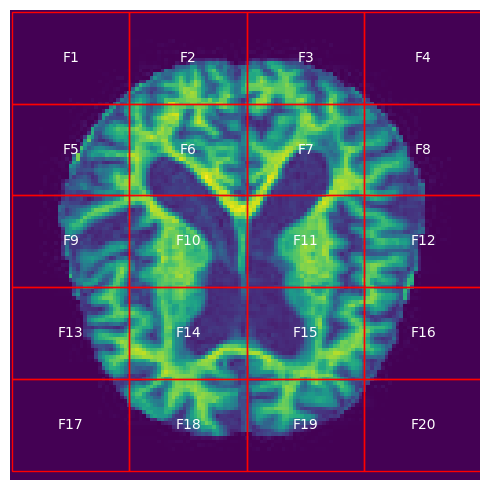

In [ ]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load your MRI scan here
mri_scan = imread('/content/drive/My Drive/10_Samples_MRI/Mild/Copy of mild_688.jpg')

# Define the number of segments in each dimension
num_segments_vertical = 5
num_segments_horizontal = 4

# Calculate the size of each segment
segment_height = mri_scan.shape[0] // num_segments_vertical
segment_width = mri_scan.shape[1] // num_segments_horizontal

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Show the image
ax.imshow(mri_scan)

# Add rectangles for the segments (optional) and label them
for i in range(num_segments_vertical):
    for j in range(num_segments_horizontal):
        # Calculate the center of each segment
        center_x = j * segment_width + segment_width / 2
        center_y = i * segment_height + segment_height / 2

        # Create a rectangle patch for the segment
        rect = patches.Rectangle((j*segment_width, i*segment_height), segment_width, segment_height,
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Label the segments with feature names, centered
        feature_label = f'F{(i*num_segments_horizontal) + j + 1}'
        ax.text(center_x, center_y, feature_label,
                ha='center', va='center', color='white')

# Turn off axes and show the plot
ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from skimage.io import imread

# Assume mri_scan is already loaded

# Load SHAP values from the .npy file
shap_values = np.load('/content/drive/My Drive/SHAPvalues/Copy of mild_688.npy')

# Remove the batch dimension by selecting the first element and sum over the channels
shap_values_aggregated = shap_values[0].sum(axis=-1)

# Ensure SHAP values and the MRI scan have the same dimensions
assert mri_scan.shape == shap_values_aggregated.shape, "The SHAP values must match the MRI scan dimensions."

# Define the number of segments
num_segments_vertical = 5
num_segments_horizontal = 4

# Calculate the size of each segment
segment_height = mri_scan.shape[0] // num_segments_vertical
segment_width = mri_scan.shape[1] // num_segments_horizontal

# Initialize an array to hold the aggregated SHAP values for each segment
aggregated_shap_values = np.zeros((num_segments_vertical, num_segments_horizontal))

# Aggregate SHAP values for each segment
for i in range(num_segments_vertical):
    for j in range(num_segments_horizontal):
        # Define the segment boundaries
        y_start = i * segment_height
        y_end = (i + 1) * segment_height if (i < num_segments_vertical - 1) else mri_scan.shape[0]
        x_start = j * segment_width
        x_end = (j + 1) * segment_width if (j < num_segments_horizontal - 1) else mri_scan.shape[1]

        # Index into the SHAP values array to get the values for this segment
        segment_shap_values = shap_values_aggregated[y_start:y_end, x_start:x_end]

        # Aggregate the SHAP values for this segment (sum or mean)
        # Choose one of the following lines:
        aggregated_value = segment_shap_values.sum()  # To sum SHAP values
        # aggregated_value = segment_shap_values.mean()  # To average SHAP values

        # Store the aggregated value in the array
        aggregated_shap_values[i, j] = aggregated_value

# Now, aggregated_shap_values contains the sum or average of SHAP values for each of the 20 segments
print(aggregated_shap_values)

[[-0.0130539   0.06792044  0.11404693 -0.01526052]
 [ 0.00355293 -0.35976487  0.23692253  0.06115529]
 [-0.15848237 -0.02025995  0.30194364 -0.17077859]
 [ 0.02903334 -0.22076704 -0.05212289 -0.10614801]
 [ 0.0117472  -0.07451158  0.12419607 -0.05287541]]


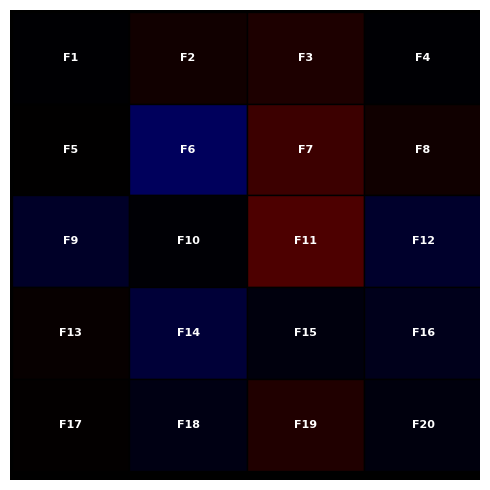

In [ ]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assume mri_scan and aggregated_shap_values are already loaded

# Define the number of segments
num_segments_vertical = 5
num_segments_horizontal = 4

# Calculate the size of each segment
segment_height = mri_scan.shape[0] // num_segments_vertical
segment_width = mri_scan.shape[1] // num_segments_horizontal

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Show the grayscale MRI scan
ax.imshow(mri_scan, cmap='gray')

# Overlay the segments with colors corresponding to the SHAP values
for i in range(num_segments_vertical):
    for j in range(num_segments_horizontal):
        # Define the segment boundaries
        y_start = i * segment_height
        y_end = (i + 1) * segment_height if (i < num_segments_vertical - 1) else mri_scan.shape[0]
        x_start = j * segment_width
        x_end = (j + 1) * segment_width if (j < num_segments_horizontal - 1) else mri_scan.shape[1]

        # Get the SHAP value for the segment
        shap_value = aggregated_shap_values[i, j]

        # Determine the color based on the SHAP value
        if shap_value > 0:
            # Positive SHAP values get the red color
            segment_color = (shap_value, 0, 0)
        else:
            # Negative SHAP values get the blue color
            segment_color = (0, 0, -shap_value)

        # Create a rectangle patch with the color of the SHAP value
        rect = patches.Rectangle((x_start, y_start), segment_width, segment_height, linewidth=1, edgecolor='black', facecolor=segment_color, fill=True)
        ax.add_patch(rect)

        # Label the segments with feature names, centered
        feature_label = f"F{(i*num_segments_horizontal) + j + 1}"
        ax.text(x_start + segment_width/2, y_start + segment_height/2, feature_label,
                horizontalalignment='center', verticalalignment='center',
                fontsize=8, color='white', weight='bold')

# Turn off axes and show the plot
ax.axis('off')
plt.tight_layout()
plt.show()


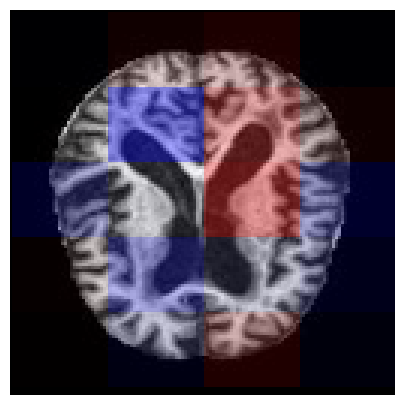

In [ ]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import Normalize



# Assume aggregated_shap_values is already loaded

# Define the number of segments
num_segments_vertical = 5
num_segments_horizontal = 4

# Calculate the size of each segment
segment_height = mri_scan.shape[0] // num_segments_vertical
segment_width = mri_scan.shape[1] // num_segments_horizontal

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Show the grayscale MRI scan
ax.imshow(mri_scan, cmap='gray')

# Overlay the segments with colors corresponding to the SHAP values
for i in range(num_segments_vertical):
    for j in range(num_segments_horizontal):
        # Define the segment boundaries
        y_start = i * segment_height
        y_end = (i + 1) * segment_height if (i < num_segments_vertical - 1) else mri_scan.shape[0]
        x_start = j * segment_width
        x_end = (j + 1) * segment_width if (j < num_segments_horizontal - 1) else mri_scan.shape[1]

        # Get the SHAP value for the segment
        shap_value = aggregated_shap_values[i, j]

        # Determine the color based on the SHAP value
        if shap_value > 0:
            # Positive SHAP values get the red color
            segment_color = (1, 0, 0, shap_value)  # Last value is alpha for transparency
        else:
            # Negative SHAP values get the blue color
            segment_color = (0, 0, 1, -shap_value)  # Last value is alpha for transparency

        # Create a rectangle patch with the color of the SHAP value
        rect = patches.Rectangle((x_start, y_start), segment_width, segment_height, linewidth=1, edgecolor=None, facecolor=segment_color, fill=True)

        # Add the patch to the axes
        ax.add_patch(rect)

# Turn off axes
ax.axis('off')
plt.show()

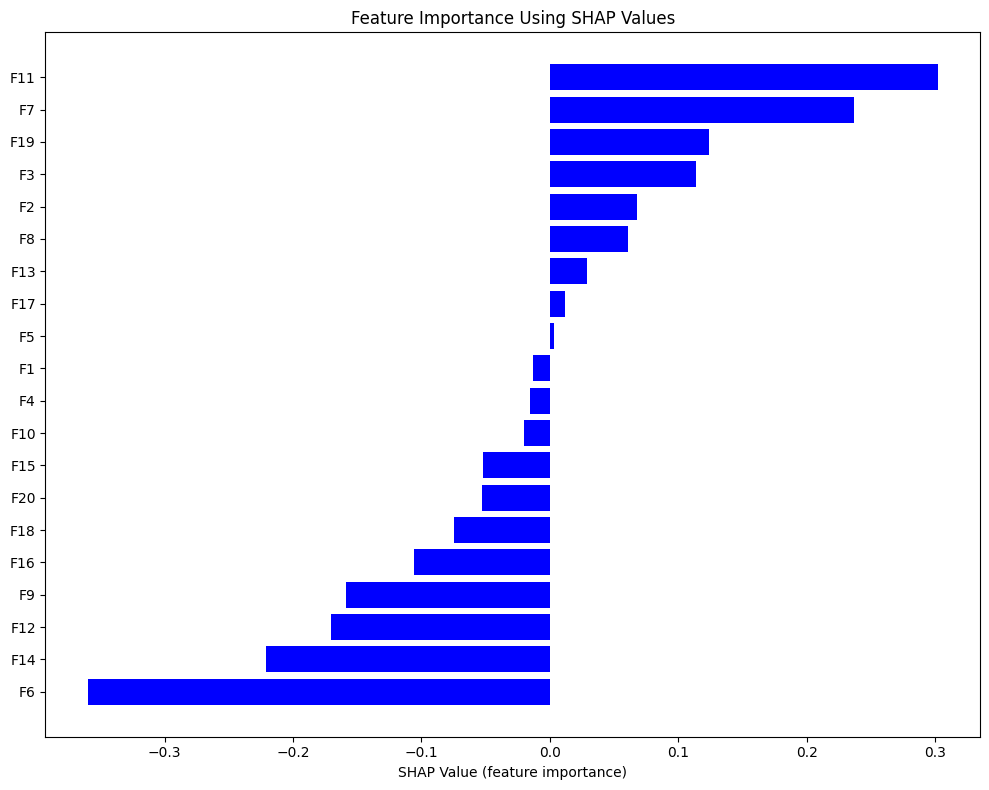

In [ ]:
import matplotlib.pyplot as plt

# Flatten the aggregated SHAP values to create a 1D array
flattened_shap_values = aggregated_shap_values.flatten()

# Create a list of segment labels corresponding to each SHAP value
segment_labels = [f'F{i+1}' for i in range(len(flattened_shap_values))]

# Sort the SHAP values and corresponding labels in descending order
sorted_indices = np.argsort(flattened_shap_values)[::-1]
sorted_shap_values = flattened_shap_values[sorted_indices]
sorted_labels = np.array(segment_labels)[sorted_indices]

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_labels, sorted_shap_values, color='blue')
plt.xlabel('SHAP Value (feature importance)')
plt.title('Feature Importance Using SHAP Values')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()
